In [5]:
# q: how hard is it to learn the identity function?

In [305]:
from difflogic import LogicLayer, GroupSum, CompiledLogicNet
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from assembled_model import AssembledLogicNet
from utils import UnaryInput, BinaryInput, BinaryOutput, train, test, plot_model

In [164]:
class EightBitNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            BinaryInput(8),
            LogicLayer(8, 64), 
            LogicLayer(64, 32), 
            LogicLayer(32, 16),
            LogicLayer(16, 8),
            BinaryOutput(8)
        )

    def forward(self, x):
        return self.model(x)

In [165]:
device = "cpu" # "cuda"
inputs = torch.arange(0, 2**8, dtype=float, device=device)
outputs = inputs
dataset = torch.utils.data.TensorDataset(inputs, outputs)
dataloader = DataLoader(dataset, batch_size=64)

In [176]:
model = EightBitNet().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [181]:
i = 0
for _ in range(100):
    print(f"{i: 3}: ", end='')
    train(dataloader, model, loss_fn, optimizer)
    i += 1

  0: loss: 1.387724  [   64/  256]
  1: loss: 1.352755  [   64/  256]
  2: loss: 1.370306  [   64/  256]
  3: loss: 1.306576  [   64/  256]
  4: loss: 1.394239  [   64/  256]
  5: loss: 1.264425  [   64/  256]
  6: loss: 1.456617  [   64/  256]
  7: loss: 1.253580  [   64/  256]
  8: loss: 1.581575  [   64/  256]
  9: loss: 1.261997  [   64/  256]
 10: loss: 1.687212  [   64/  256]
 11: loss: 1.294994  [   64/  256]
 12: loss: 1.595758  [   64/  256]
 13: loss: 1.373191  [   64/  256]
 14: loss: 1.383971  [   64/  256]
 15: loss: 1.387551  [   64/  256]
 16: loss: 1.243961  [   64/  256]
 17: loss: 1.328540  [   64/  256]
 18: loss: 1.221267  [   64/  256]
 19: loss: 1.262851  [   64/  256]
 20: loss: 1.224644  [   64/  256]
 21: loss: 1.199364  [   64/  256]
 22: loss: 1.198317  [   64/  256]
 23: loss: 1.167228  [   64/  256]
 24: loss: 1.184129  [   64/  256]
 25: loss: 1.169065  [   64/  256]
 26: loss: 1.182939  [   64/  256]
 27: loss: 1.174361  [   64/  256]
 28: loss: 1.175408 

In [183]:
test(model, inputs, outputs, loss_fn)

256it [00:00, 638.47it/s]


Loss: 2062.5


tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,   8.,   8.,   8.,
          8.,   8.,   8.,   8.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
         24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  38.,  38.,  38.,  38.,
         38.,  38.,  38.,  38.,  46.,  46.,  46.,  46.,  46.,  46.,  46.,  46.,
         54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  62.,  62.,  62.,  62.,
         62.,  62.,  62.,  62., 128., 128., 128., 128., 128., 128., 128., 128.,
        136., 136., 136., 136., 136., 136., 136., 136., 144., 144., 144., 144.,
        144., 144., 144., 144., 152., 152., 152., 152., 152., 152., 152., 152.,
        166., 166., 166., 166., 166., 166., 166., 166., 174., 174., 174., 174.,
        174., 174., 174., 174., 182., 182., 182., 182., 182., 182., 182., 182.,
        190., 190., 190., 190., 190., 190., 190., 190., 193., 193., 193., 193.,
        193., 193., 193., 193., 201., 201., 201., 201., 201., 201., 201., 201.,
        209., 209., 209., 209., 209., 20

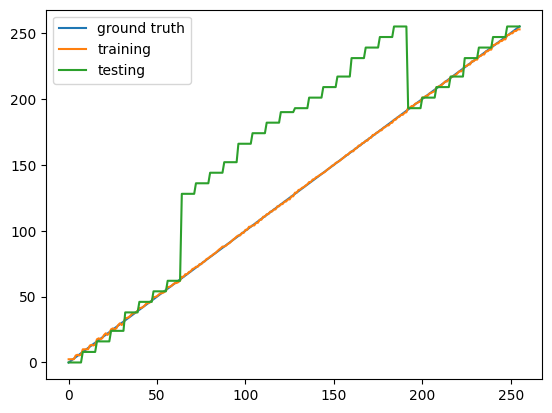

In [190]:
plot_model(model)

In [191]:
cln = CompiledLogicNet(model.model)
c = cln.get_c_code()

AssertionError: The last layer of the model must be GroupSum, but it is <class '__main__.BinaryOutput'> / BinaryOutput() instead.

# GroupSum

In [296]:
class GroupSumNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            UnaryInput(255),
            # LogicLayer(255, 510)
            # LogicLayer(510, 255)
            LogicLayer(255, 255),
            GroupSum(1),
            nn.Flatten(0),
        )

    def forward(self, X):
        return self.model(X)

In [297]:
model = GroupSumNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
i = 0
dataloader = DataLoader(dataset, batch_size=64)

In [298]:
# see https://pytorch.org/tutorials/recipes/recipes/reasoning_about_shapes.html
# def fw_hook(module, input, output):
#     print(f"Shape of output to {module} is {input[0].shape} {output.shape}.")

# model = GroupSumNet()

# for layer in model.model:
#     layer.register_forward_hook(fw_hook)

# train(dataloader, model, loss_fn, optimizer)

In [301]:
for _ in range(100):
    print(f"{i: 3}: ", end='')
    train(dataloader, model, loss_fn, optimizer)
    i += 1

 100: loss: 6.999394  [   64/  256]
 101: loss: 6.904042  [   64/  256]
 102: loss: 6.811117  [   64/  256]
 103: loss: 6.720552  [   64/  256]
 104: loss: 6.632281  [   64/  256]
 105: loss: 6.546240  [   64/  256]
 106: loss: 6.462362  [   64/  256]
 107: loss: 6.380582  [   64/  256]
 108: loss: 6.300836  [   64/  256]
 109: loss: 6.223060  [   64/  256]
 110: loss: 6.147192  [   64/  256]
 111: loss: 6.073171  [   64/  256]
 112: loss: 6.000939  [   64/  256]
 113: loss: 5.930440  [   64/  256]
 114: loss: 5.861617  [   64/  256]
 115: loss: 5.794420  [   64/  256]
 116: loss: 5.728797  [   64/  256]
 117: loss: 5.664701  [   64/  256]
 118: loss: 5.602087  [   64/  256]
 119: loss: 5.540911  [   64/  256]
 120: loss: 5.481130  [   64/  256]
 121: loss: 5.422706  [   64/  256]
 122: loss: 5.365600  [   64/  256]
 123: loss: 5.309777  [   64/  256]
 124: loss: 5.255201  [   64/  256]
 125: loss: 5.201839  [   64/  256]
 126: loss: 5.149658  [   64/  256]
 127: loss: 5.098629  [   64

In [303]:
torch.save(model, "unary_identity_8bit.pkl")

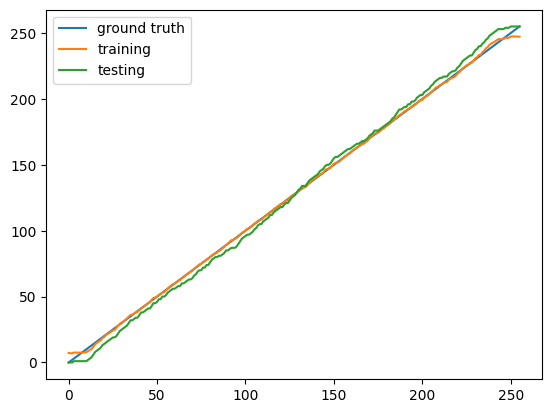

In [302]:
plot_model(model)

In [155]:
cln = CompiledLogicNet(gsn.model)
c = cln.get_c_code()

In [157]:
print(c)

#include <stddef.h>
#include <stdlib.h>
#include <stdbool.h>

void logic_gate_net(long long const *inp, long long *out) {
	out[0] = ~v13;
	out[1] = ~(v219 & v254);
	out[2] = ~(v180 & v31);
	out[3] = v178 | v76;
	out[4] = ~v183 | v135;
	out[5] = v115 & v65;
	out[6] = v156 & ~v208;
	out[7] = ~v177 | v3;
	out[8] = v96 & ~v243;
	out[9] = ~(v195 | v155);
	out[10] = ~0LL;
	out[11] = ~v205;
	out[12] = ~v190;
	out[13] = v213 & ~v119;
	out[14] = 0LL;
	out[15] = 0LL;
	out[16] = ~v229;
	out[17] = ~v101 | v109;
	out[18] = ~(v175 & v222);
	out[19] = v83 | v139;
	out[20] = v88 ^ v167;
	out[21] = ~v164 | v230;
	out[22] = v121 & v107;
	out[23] = ~(v217 | v61);
	out[24] = v203 & v60;
	out[25] = 0LL;
	out[26] = v212 & ~v27;
	out[27] = v242;
	out[28] = ~v163;
	out[29] = v29 | v158;
	out[30] = ~v231;
	out[31] = ~v141 | v250;
	out[32] = v78 | v137;
	out[33] = v113 & ~v81;
	out[34] = ~(v173 | v24);
	out[35] = ~(v40 & v74);
	out[36] = v114;
	out[37] = ~(v73 & v224);
	out[38] = ~(v2 ^ v114);
	out[39] = ~v226 

# Hybrid
Bitwise input, GroupSum output

In [3]:
class HybridNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            LogicLayer(8, 16),
            LogicLayer(16, 32),
            LogicLayer(32, 64),
            LogicLayer(64, 128),
            LogicLayer(128, 255),
            GroupSum(1),
        )

    def forward(self, t):
        t = t.to(int)
        # convert int to bits
        t = [(t & (1 << i)) >> i for i in range(8)]
        t = torch.Tensor(t)
        return self.model(t)

In [43]:
model = HybridNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [38]:
model(torch.Tensor([5]))

tensor([127.2074], grad_fn=<DivBackward0>)

In [46]:
i = 0

In [48]:
for _ in range(100):
    reconstructed = train(model, inputs, outputs, loss_fn, optimizer, i)
    i += 1

256it [00:00, 336.58it/s]


Loss at Epoch 100: 6.896052360534668


256it [00:00, 363.69it/s]


Loss at Epoch 101: 6.7634406089782715


256it [00:00, 365.47it/s]


Loss at Epoch 102: 6.62700080871582


256it [00:00, 318.78it/s]


Loss at Epoch 103: 6.488084316253662


256it [00:00, 329.36it/s]


Loss at Epoch 104: 6.351476669311523


256it [00:00, 321.46it/s]


Loss at Epoch 105: 6.223618030548096


256it [00:00, 362.67it/s]


Loss at Epoch 106: 6.108936309814453


256it [00:00, 392.82it/s]


Loss at Epoch 107: 6.007664680480957


256it [00:00, 313.25it/s]


Loss at Epoch 108: 5.9160261154174805


256it [00:00, 401.18it/s]


Loss at Epoch 109: 5.828182220458984


256it [00:00, 383.07it/s]


Loss at Epoch 110: 5.739236831665039


256it [00:00, 337.93it/s]


Loss at Epoch 111: 5.64747953414917


256it [00:00, 354.08it/s]


Loss at Epoch 112: 5.555158615112305


256it [00:00, 349.67it/s]


Loss at Epoch 113: 5.467850208282471


256it [00:00, 382.94it/s]


Loss at Epoch 114: 5.391549110412598


256it [00:00, 392.31it/s]


Loss at Epoch 115: 5.328770160675049


256it [00:00, 318.05it/s]


Loss at Epoch 116: 5.276609420776367


256it [00:00, 368.41it/s]


Loss at Epoch 117: 5.228791236877441


256it [00:00, 306.86it/s]


Loss at Epoch 118: 5.179455757141113


256it [00:00, 397.67it/s]


Loss at Epoch 119: 5.1257643699646


256it [00:00, 386.47it/s]


Loss at Epoch 120: 5.068523406982422


256it [00:00, 353.94it/s]


Loss at Epoch 121: 5.011335372924805


256it [00:00, 400.39it/s]


Loss at Epoch 122: 4.959047317504883


256it [00:00, 345.54it/s]


Loss at Epoch 123: 4.915056228637695


256it [00:00, 350.40it/s]


Loss at Epoch 124: 4.878862380981445


256it [00:00, 336.70it/s]


Loss at Epoch 125: 4.846156597137451


256it [00:00, 320.73it/s]


Loss at Epoch 126: 4.811933517456055


256it [00:00, 347.29it/s]


Loss at Epoch 127: 4.77396821975708


256it [00:00, 357.77it/s]


Loss at Epoch 128: 4.733677387237549


256it [00:00, 337.90it/s]


Loss at Epoch 129: 4.69417142868042


256it [00:00, 404.68it/s]


Loss at Epoch 130: 4.657814979553223


256it [00:00, 348.26it/s]


Loss at Epoch 131: 4.624876022338867


256it [00:00, 315.85it/s]


Loss at Epoch 132: 4.593756198883057


256it [00:00, 340.82it/s]


Loss at Epoch 133: 4.56226110458374


256it [00:00, 339.08it/s]


Loss at Epoch 134: 4.528994560241699


256it [00:00, 334.80it/s]


Loss at Epoch 135: 4.494022846221924


256it [00:00, 380.03it/s]


Loss at Epoch 136: 4.45855712890625


256it [00:00, 355.43it/s]


Loss at Epoch 137: 4.424131870269775


256it [00:00, 373.67it/s]


Loss at Epoch 138: 4.391674518585205


256it [00:00, 329.66it/s]


Loss at Epoch 139: 4.361122131347656


256it [00:00, 269.89it/s]


Loss at Epoch 140: 4.331765651702881


256it [00:00, 383.41it/s]


Loss at Epoch 141: 4.302794456481934


256it [00:00, 407.34it/s]


Loss at Epoch 142: 4.273806095123291


256it [00:00, 326.14it/s]


Loss at Epoch 143: 4.244922637939453


256it [00:00, 325.98it/s]


Loss at Epoch 144: 4.216629505157471


256it [00:00, 353.12it/s]


Loss at Epoch 145: 4.189346790313721


256it [00:00, 350.28it/s]


Loss at Epoch 146: 4.163181304931641


256it [00:00, 352.14it/s]


Loss at Epoch 147: 4.137846946716309


256it [00:00, 339.47it/s]


Loss at Epoch 148: 4.112868309020996


256it [00:00, 364.70it/s]


Loss at Epoch 149: 4.08790397644043


256it [00:00, 353.67it/s]


Loss at Epoch 150: 4.062817096710205


256it [00:00, 358.26it/s]


Loss at Epoch 151: 4.037750244140625


256it [00:00, 394.46it/s]


Loss at Epoch 152: 4.012930870056152


256it [00:00, 384.16it/s]


Loss at Epoch 153: 3.988518476486206


256it [00:00, 346.78it/s]


Loss at Epoch 154: 3.9644792079925537


256it [00:00, 333.33it/s]


Loss at Epoch 155: 3.940654754638672


256it [00:00, 403.92it/s]


Loss at Epoch 156: 3.916869640350342


256it [00:00, 302.05it/s]


Loss at Epoch 157: 3.8930654525756836


256it [00:00, 338.71it/s]


Loss at Epoch 158: 3.8694169521331787


256it [00:00, 395.04it/s]


Loss at Epoch 159: 3.846212387084961


256it [00:00, 304.94it/s]


Loss at Epoch 160: 3.8236846923828125


256it [00:00, 366.82it/s]


Loss at Epoch 161: 3.801769256591797


256it [00:00, 344.23it/s]


Loss at Epoch 162: 3.7800850868225098


256it [00:01, 251.11it/s]


Loss at Epoch 163: 3.758117198944092


256it [00:00, 286.12it/s]


Loss at Epoch 164: 3.7356245517730713


256it [00:01, 251.05it/s]


Loss at Epoch 165: 3.7128024101257324


256it [00:00, 293.28it/s]


Loss at Epoch 166: 3.6901299953460693


256it [00:00, 267.87it/s]


Loss at Epoch 167: 3.6680965423583984


256it [00:00, 362.84it/s]


Loss at Epoch 168: 3.646904230117798


256it [00:01, 240.07it/s]


Loss at Epoch 169: 3.626403331756592


256it [00:00, 337.69it/s]


Loss at Epoch 170: 3.6062746047973633


256it [00:00, 382.68it/s]


Loss at Epoch 171: 3.586287021636963


256it [00:00, 318.77it/s]


Loss at Epoch 172: 3.5664100646972656


256it [00:00, 321.94it/s]


Loss at Epoch 173: 3.546811580657959


256it [00:00, 371.38it/s]


Loss at Epoch 174: 3.5277040004730225


256it [00:00, 271.76it/s]


Loss at Epoch 175: 3.5092742443084717


256it [00:00, 322.40it/s]


Loss at Epoch 176: 3.491537094116211


256it [00:00, 375.03it/s]


Loss at Epoch 177: 3.474367618560791


256it [00:00, 291.74it/s]


Loss at Epoch 178: 3.457700729370117


256it [00:00, 296.53it/s]


Loss at Epoch 179: 3.4415102005004883


256it [00:00, 338.15it/s]


Loss at Epoch 180: 3.4258573055267334


256it [00:00, 347.99it/s]


Loss at Epoch 181: 3.4107730388641357


256it [00:00, 330.97it/s]


Loss at Epoch 182: 3.3962349891662598


256it [00:00, 329.94it/s]


Loss at Epoch 183: 3.3821797370910645


256it [00:00, 346.64it/s]


Loss at Epoch 184: 3.3685190677642822


256it [00:00, 379.11it/s]


Loss at Epoch 185: 3.355262279510498


256it [00:00, 323.57it/s]


Loss at Epoch 186: 3.3424196243286133


256it [00:00, 369.80it/s]


Loss at Epoch 187: 3.330049514770508


256it [00:00, 365.85it/s]


Loss at Epoch 188: 3.3181369304656982


256it [00:00, 335.91it/s]


Loss at Epoch 189: 3.3066272735595703


256it [00:00, 363.55it/s]


Loss at Epoch 190: 3.2954530715942383


256it [00:00, 401.35it/s]


Loss at Epoch 191: 3.2845561504364014


256it [00:00, 356.57it/s]


Loss at Epoch 192: 3.273911476135254


256it [00:00, 354.36it/s]


Loss at Epoch 193: 3.2635321617126465


256it [00:00, 351.43it/s]


Loss at Epoch 194: 3.2534327507019043


256it [00:00, 327.27it/s]


Loss at Epoch 195: 3.24360728263855


256it [00:00, 386.64it/s]


Loss at Epoch 196: 3.2340312004089355


256it [00:00, 319.12it/s]


Loss at Epoch 197: 3.2246479988098145


256it [00:00, 352.37it/s]


Loss at Epoch 198: 3.215437889099121


256it [00:00, 403.53it/s]


Loss at Epoch 199: 3.206360340118408


In [50]:
torch.save(model, "identity_8bit.pkl")

256it [00:00, 511.13it/s]


Loss: 246.8359375


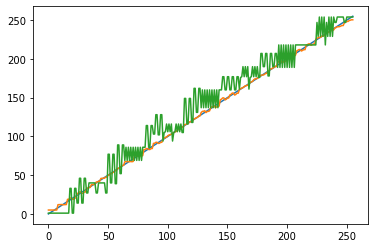

In [49]:
plt.plot(outputs)
plt.plot(reconstructed.detach())
plt.plot(test(model, inputs, outputs, loss_fn).detach())

In [13]:
help(CompiledLogicNet)

Help on class CompiledLogicNet in module difflogic.compiled_model:

class CompiledLogicNet(torch.nn.modules.module.Module)
 |  CompiledLogicNet(model: torch.nn.modules.container.Sequential, device='cpu', num_bits=64, cpu_compiler='gcc', verbose=False)
 |  
 |  Method resolution order:
 |      CompiledLogicNet
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model: torch.nn.modules.container.Sequential, device='cpu', num_bits=64, cpu_compiler='gcc', verbose=False)
 |      Initialize internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  compile(self, opt_level=1, save_lib_path=None, verbose=False)
 |      Regarding the optimization level for C compiler:
 |      
 |      compilation time vs. call time for 48k lines of code
 |      -O0 -> 5.5s compiling -> 269ms call
 |      -O1 -> 190s compiling -> 125ms call
 |      -O2 -> 256s compiling -> 130ms call
 |      -O3 -> 346s compiling -> 124ms call
 |  

In [51]:
cln = CompiledLogicNet(model.model, num_bits=32)
c = cln.get_c_code()

In [52]:
print(c)

#include <stddef.h>
#include <stdlib.h>
#include <stdbool.h>

void logic_gate_net(int const *inp, int *out) {
	const int v0 = ~(inp[5] | inp[6]);
	const int v1 = 0;
	const int v2 = ~inp[5];
	const int v3 = ~(inp[0] | inp[1]);
	const int v4 = inp[7];
	const int v5 = ~(inp[4] & inp[3]);
	const int v6 = ~(inp[4] & inp[1]);
	const int v7 = ~inp[5];
	const int v8 = ~0;
	const int v9 = ~(inp[0] | inp[4]);
	const int v10 = ~(inp[7] | inp[6]);
	const int v11 = inp[7];
	const int v12 = ~inp[6];
	const int v13 = inp[7];
	const int v14 = ~(inp[5] & inp[6]);
	const int v15 = inp[1] | inp[2];
	const int v16 = ~(v8 | v2);
	const int v17 = ~0;
	const int v18 = v5;
	const int v19 = v10 | v9;
	const int v20 = ~(v14 | v3);
	const int v21 = v6 & ~v15;
	const int v22 = v15 & ~v7;
	const int v23 = ~v11 | v0;
	const int v24 = ~0;
	const int v25 = ~v1 | v13;
	const int v26 = v1 & ~v5;
	const int v27 = v13;
	const int v28 = v15 | v2;
	const int v29 = v0 | v12;
	const int v30 = ~v7;
	const int v31 = ~(v4 & v11

In [53]:
cln.compile()

Compiling finished in 0.089 seconds.


In [4]:
model = torch.load("identity_8bit.pkl")

In [5]:
import importlib
import assembled_model
importlib.reload(assembled_model)
from assembled_model import AssembledLogicNet
print(AssembledLogicNet(model.model).get_asm())


LDI R0, 0 // inp
LDI R1, 8 // v

// R14 has the input
// R2 has the count
// R3 has the memory offset
// R4 has the bit
LDI R2, 0
LDI R3, 0
INPUT_BITPACK:
AND R4, R14, 1
SBBO R4, R0, R3, 1
ADD R2, R2, 1
ADD R3, R3, 1 // TODO: consolidate with R2 if we stick with 8-bit batches
LSR R14, R14, 1
QBGT INPUT_BITPACK, R2, 8

LDI R5, 8
// layer[0][0] = not_or(input[5], input[6])
LBBO R2.b0, R0, 5, 1
LBBO R3.b0, R0, 6, 1
OR R4, R2, R3
NOT R4, R4
SBBO R4.b0, R5, 0, 1

// layer[0][1] = zero(input[3], input[2])
LDI R4, 0
SBBO R4.b0, R5, 1, 1

// layer[0][2] = not_b(input[2], input[5])
LBBO R3.b0, R0, 5, 1
NOT R4, R3
SBBO R4.b0, R5, 2, 1

// layer[0][3] = not_or(input[0], input[1])
LBBO R2.b0, R0, 0, 1
LBBO R3.b0, R0, 1, 1
OR R4, R2, R3
NOT R4, R4
SBBO R4.b0, R5, 3, 1

// layer[0][4] = b(input[4], input[7])
LBBO R3.b0, R0, 7, 1
MOV R4, R3
SBBO R4.b0, R5, 4, 1

// layer[0][5] = not_and(input[4], input[3])
LBBO R2.b0, R0, 4, 1
LBBO R3.b0, R0, 3, 1
AND R4, R2, R3
NOT R4, R4
SBBO R4.b0, R5, 5, 1

// l

In [55]:
class EightBitNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            LogicLayer(8, 2048),
            LogicLayer(2048, 1024),
            LogicLayer(1024, 512), 
            LogicLayer(512, 256),
            LogicLayer(256, 128),
            LogicLayer(128, 64),
            LogicLayer(64, 32),
            LogicLayer(32, 16),
            LogicLayer(16, 8),
        )

    def forward(self, t):
        t = t.to(int)
        # convert int to bits
        t = [(t & (1 << i)) >> i for i in range(8)]
        t = torch.Tensor(t)
        output = self.model(t)
        # convert bits to int
        return sum([(2**i)*output[i] for i in range(8)])

In [58]:
model = EightBitNet()

In [59]:
i = 0

In [60]:
for _ in range(100):
    reconstructed = train(model, inputs, outputs, loss_fn, optimizer, i)
    i += 1

256it [00:01, 159.16it/s]


Loss at Epoch 0: 5500.69482421875


256it [00:01, 167.13it/s]


Loss at Epoch 1: 5500.69482421875


256it [00:01, 158.70it/s]


Loss at Epoch 2: 5500.69482421875


0it [00:00, ?it/s]


KeyboardInterrupt: 

# Tiny network for debugging purposes

In [4]:
class TinyNet(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            LogicLayer(2, 3),
            GroupSum(1),
        )

    def forward(self, t):
        t = t.to(int)
        # convert int to bits
        t = [(t & (1 << i)) >> i for i in range(2)]
        t = torch.Tensor(t)
        return self.model(t)

In [5]:
model = TinyNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

inputs = torch.arange(0, 2**2)
outputs = inputs

In [6]:
model.eval()
for i in range(4):
    print(model(torch.tensor([i])))

tensor([2.])
tensor([2.])
tensor([3.])
tensor([3.])


In [7]:
i = 0

In [8]:
for _ in range(100):
    reconstructed = train(model, inputs, outputs, loss_fn, optimizer, i)
    i += 1

4it [00:00, 739.54it/s]


Loss at Epoch 0: 1.3283318281173706


4it [00:00, 1224.79it/s]


Loss at Epoch 1: 1.2033698558807373


4it [00:00, 1315.14it/s]


Loss at Epoch 2: 1.090277910232544


4it [00:00, 1576.81it/s]


Loss at Epoch 3: 0.9890427589416504


4it [00:00, 1483.00it/s]


Loss at Epoch 4: 0.8982504606246948


4it [00:00, 1746.54it/s]


Loss at Epoch 5: 0.816819965839386


4it [00:00, 1223.90it/s]


Loss at Epoch 6: 0.744179368019104


4it [00:00, 1703.27it/s]


Loss at Epoch 7: 0.6796504259109497


4it [00:00, 1430.89it/s]


Loss at Epoch 8: 0.6223004460334778


4it [00:00, 1573.55it/s]


Loss at Epoch 9: 0.5711389780044556


4it [00:00, 1669.04it/s]


Loss at Epoch 10: 0.5252417325973511


4it [00:00, 1360.57it/s]


Loss at Epoch 11: 0.4837130308151245


4it [00:00, 1838.20it/s]


Loss at Epoch 12: 0.4456557035446167


4it [00:00, 1354.42it/s]


Loss at Epoch 13: 0.4102136790752411


4it [00:00, 1501.59it/s]


Loss at Epoch 14: 0.3766356110572815


4it [00:00, 979.69it/s]


Loss at Epoch 15: 0.3443112075328827


4it [00:00, 1417.95it/s]


Loss at Epoch 16: 0.31279170513153076


4it [00:00, 1194.62it/s]


Loss at Epoch 17: 0.28180766105651855


4it [00:00, 1095.33it/s]


Loss at Epoch 18: 0.2512909770011902


4it [00:00, 1107.19it/s]


Loss at Epoch 19: 0.22138136625289917


4it [00:00, 1106.09it/s]


Loss at Epoch 20: 0.19240418076515198


4it [00:00, 1071.34it/s]


Loss at Epoch 21: 0.16481560468673706


4it [00:00, 1161.86it/s]


Loss at Epoch 22: 0.13912326097488403


4it [00:00, 1261.26it/s]


Loss at Epoch 23: 0.11579400300979614


4it [00:00, 1495.30it/s]


Loss at Epoch 24: 0.09517236053943634


4it [00:00, 1321.67it/s]


Loss at Epoch 25: 0.07742606103420258


4it [00:00, 1524.51it/s]


Loss at Epoch 26: 0.06253345310688019


4it [00:00, 1471.17it/s]


Loss at Epoch 27: 0.050308652222156525


4it [00:00, 1465.39it/s]


Loss at Epoch 28: 0.040453776717185974


4it [00:00, 1062.93it/s]


Loss at Epoch 29: 0.03261681646108627


4it [00:00, 1424.57it/s]


Loss at Epoch 30: 0.02644098922610283


4it [00:00, 1085.90it/s]


Loss at Epoch 31: 0.021598096936941147


4it [00:00, 1358.92it/s]


Loss at Epoch 32: 0.017805512994527817


4it [00:00, 1104.35it/s]


Loss at Epoch 33: 0.014830626547336578


4it [00:00, 1492.63it/s]


Loss at Epoch 34: 0.012488096952438354


4it [00:00, 982.27it/s]


Loss at Epoch 35: 0.01063329167664051


4it [00:00, 1194.36it/s]


Loss at Epoch 36: 0.009154743514955044


4it [00:00, 1346.05it/s]


Loss at Epoch 37: 0.007967406883835793


4it [00:00, 1630.91it/s]


Loss at Epoch 38: 0.007006395608186722


4it [00:00, 1512.55it/s]


Loss at Epoch 39: 0.006222347728908062


4it [00:00, 1351.37it/s]


Loss at Epoch 40: 0.005577537696808577


4it [00:00, 1420.23it/s]


Loss at Epoch 41: 0.005043040029704571


4it [00:00, 1345.84it/s]


Loss at Epoch 42: 0.00459662638604641


4it [00:00, 1897.02it/s]


Loss at Epoch 43: 0.004221012815833092


4it [00:00, 1388.27it/s]


Loss at Epoch 44: 0.0039027510210871696


4it [00:00, 1019.64it/s]


Loss at Epoch 45: 0.00363126746378839


4it [00:00, 1028.27it/s]


Loss at Epoch 46: 0.003398215863853693


4it [00:00, 1197.18it/s]


Loss at Epoch 47: 0.003196950536221266


4it [00:00, 1414.01it/s]


Loss at Epoch 48: 0.0030221017077565193


4it [00:00, 1501.45it/s]


Loss at Epoch 49: 0.0028694220818579197


4it [00:00, 1776.31it/s]


Loss at Epoch 50: 0.002735365182161331


4it [00:00, 1397.64it/s]


Loss at Epoch 51: 0.002617097459733486


4it [00:00, 1812.38it/s]


Loss at Epoch 52: 0.0025123003870248795


4it [00:00, 1434.32it/s]


Loss at Epoch 53: 0.0024189914111047983


4it [00:00, 1636.48it/s]


Loss at Epoch 54: 0.0023355502635240555


4it [00:00, 1602.10it/s]


Loss at Epoch 55: 0.002260650973767042


4it [00:00, 1361.79it/s]


Loss at Epoch 56: 0.002193144056946039


4it [00:00, 1390.34it/s]


Loss at Epoch 57: 0.002132067456841469


4it [00:00, 1198.80it/s]


Loss at Epoch 58: 0.0020766211673617363


4it [00:00, 1404.66it/s]


Loss at Epoch 59: 0.0020260820165276527


4it [00:00, 968.94it/s]


Loss at Epoch 60: 0.001979877008125186


4it [00:00, 966.54it/s]


Loss at Epoch 61: 0.0019374917028471828


4it [00:00, 1127.43it/s]


Loss at Epoch 62: 0.0018984618363901973


4it [00:00, 1092.12it/s]


Loss at Epoch 63: 0.001862437929958105


4it [00:00, 1080.94it/s]


Loss at Epoch 64: 0.001829058164730668


4it [00:00, 1728.36it/s]


Loss at Epoch 65: 0.0017980510601773858


4it [00:00, 1298.45it/s]


Loss at Epoch 66: 0.0017691534012556076


4it [00:00, 1699.13it/s]


Loss at Epoch 67: 0.0017421424854546785


4it [00:00, 1568.70it/s]


Loss at Epoch 68: 0.0017168312333524227


4it [00:00, 1455.47it/s]


Loss at Epoch 69: 0.001693028723821044


4it [00:00, 1691.76it/s]


Loss at Epoch 70: 0.0016705985181033611


4it [00:00, 1127.73it/s]


Loss at Epoch 71: 0.0016494063893333077


4it [00:00, 1640.32it/s]


Loss at Epoch 72: 0.0016293140361085534


4it [00:00, 1764.17it/s]


Loss at Epoch 73: 0.001610232749953866


4it [00:00, 1597.53it/s]


Loss at Epoch 74: 0.0015920732403174043


4it [00:00, 1632.02it/s]


Loss at Epoch 75: 0.0015747298020869493


4it [00:00, 1485.50it/s]


Loss at Epoch 76: 0.0015581385232508183


4it [00:00, 1467.31it/s]


Loss at Epoch 77: 0.0015422384021803737


4it [00:00, 1672.04it/s]


Loss at Epoch 78: 0.0015269513241946697


4it [00:00, 1257.57it/s]


Loss at Epoch 79: 0.001512239221483469


4it [00:00, 1312.05it/s]


Loss at Epoch 80: 0.001498055411502719


4it [00:00, 1143.17it/s]


Loss at Epoch 81: 0.0014843534445390105


4it [00:00, 1567.38it/s]


Loss at Epoch 82: 0.0014710703399032354


4it [00:00, 1092.91it/s]


Loss at Epoch 83: 0.0014582062140107155


4it [00:00, 1234.89it/s]


Loss at Epoch 84: 0.0014457195065915585


4it [00:00, 1822.82it/s]


Loss at Epoch 85: 0.001433557947166264


4it [00:00, 1610.25it/s]


Loss at Epoch 86: 0.0014217275893315673


4it [00:00, 1564.16it/s]


Loss at Epoch 87: 0.0014101738343015313


4it [00:00, 1155.85it/s]


Loss at Epoch 88: 0.0013988988939672709


4it [00:00, 1665.89it/s]


Loss at Epoch 89: 0.0013878706376999617


4it [00:00, 1659.30it/s]


Loss at Epoch 90: 0.0013771036174148321


4it [00:00, 1240.46it/s]


Loss at Epoch 91: 0.0013665365986526012


4it [00:00, 1829.78it/s]


Loss at Epoch 92: 0.0013561785453930497


4it [00:00, 1001.92it/s]


Loss at Epoch 93: 0.0013460104819387197


4it [00:00, 1455.85it/s]


Loss at Epoch 94: 0.0013360357843339443


4it [00:00, 1480.12it/s]


Loss at Epoch 95: 0.0013262247666716576


4it [00:00, 1433.58it/s]


Loss at Epoch 96: 0.0013165776617825031


4it [00:00, 1511.60it/s]


Loss at Epoch 97: 0.0013070907443761826


4it [00:00, 1375.63it/s]


Loss at Epoch 98: 0.0012977338628843427


4it [00:00, 1832.57it/s]


Loss at Epoch 99: 0.0012885145843029022


4it [00:00, 1274.86it/s]

Loss: 0.0


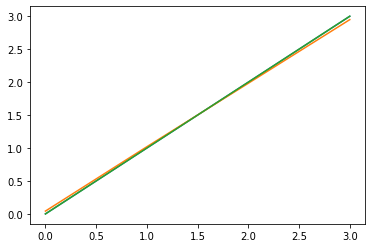

In [9]:
plt.plot(outputs)
plt.plot(reconstructed.detach())
plt.plot(test(model, inputs, outputs, loss_fn).detach())

In [10]:
cln = CompiledLogicNet(model.model, num_bits=32)
c = cln.get_c_code()
print(c)

#include <stddef.h>
#include <stdlib.h>
#include <stdbool.h>

void logic_gate_net(int const *inp, int *out) {
	out[0] = v1;
	out[1] = v0 & v0;
	out[2] = v1 & v1;
}

void apply_logic_gate_net (bool const *inp, int *out, size_t len) {
    int *inp_temp = malloc(2*sizeof(int));
    int *out_temp = malloc(3*sizeof(int));
    int *out_temp_o = malloc(2*sizeof(int));
    
    for(size_t i = 0; i < len; ++i) {
    
        // Converting the bool array into a bitpacked array
        for(size_t d = 0; d < 2; ++d) {
            int res = 0;
            for(size_t b = 0; b < 32; ++b) {
                res <<= 1;
                res += !!(inp[i * 2 * 32 + (32 - b - 1) * 2 + d]);
            }
            inp_temp[d] = res;
        }
    
        // Applying the logic gate net
        logic_gate_net(inp_temp, out_temp);
        
        // GroupSum of the results via logic gate networks
        for(size_t c = 0; c < 1; ++c) {  // for each class
            // Initialize the output bits
            

In [27]:
torch.save(model, "identity_2bit.pkl")

In [41]:
print(AssembledLogicNet(model.model).get_asm())


MOV R0, 0 // inp
MOV R1, 8 // v

// R14 has the input
// R2 has the count
// R3 has the memory offset
// R4 has the bit
MOV R2, 0
MOV R3, 0
INPUT_BITPACK:
AND R4, R14, 1
SBBO R4, R0, R3, 4
ADD R2, R2, 1
ADD R3, R3, 4
LSR R14, R14, 1
QBGT INPUT_BITPACK, R2, 2

LBBO R2, R0, 0, 4
LBBO R3, R0, 4, 4
MOV R4, R3
SBBO R4, R1, 0, 4

LBBO R2, R0, 0, 4
LBBO R3, R0, 0, 4
AND R4, R2, R3
SBBO R4, R1, 4, 4

LBBO R2, R0, 4, 4
LBBO R3, R0, 4, 4
AND R4, R2, R3
SBBO R4, R1, 8, 4


// just handling one input & output for the moment...
MOV R0, 8 // out_temp
// R1 has the count
// R2 has the memory offset
// R3 has the output value
// R14 has the running total
MOV R1, 0
MOV R2, 0
MOV R14, 0
GROUPSUM:
LBBO R3, R0, R2, 4
AND R3, R3, 1
ADD R14, R14, R3
ADD R1, R1, 1
ADD R2, R2, 4
QBGT GROUPSUM, R1, 3



# One-Hot

In [58]:
class OneHot(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.model = nn.Sequential(
            LogicLayer(256, 256),
        )

    def forward(self, t):
        t = t.to(int)
        a = torch.zeros(256)
        a[t] = 1
        # unclear what format the output should take here
        return torch.sum(self.model(a) * torch.arange(256))

In [59]:
model = OneHot()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
i = 0

In [80]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [83]:
for _ in range(100):
    reconstructed = train(model, inputs, outputs, loss_fn, optimizer, i)
    i += 1

256it [00:00, 932.89it/s]


Loss at Epoch 900: 467.0209655761719


256it [00:00, 1470.62it/s]


Loss at Epoch 901: 465.46209716796875


256it [00:00, 1343.13it/s]


Loss at Epoch 902: 464.24554443359375


256it [00:00, 1098.69it/s]


Loss at Epoch 903: 463.09539794921875


256it [00:00, 1203.25it/s]


Loss at Epoch 904: 462.18756103515625


256it [00:00, 1450.45it/s]


Loss at Epoch 905: 461.2127990722656


256it [00:00, 1439.24it/s]


Loss at Epoch 906: 460.5146484375


256it [00:00, 1402.12it/s]


Loss at Epoch 907: 459.9384765625


256it [00:00, 1307.48it/s]


Loss at Epoch 908: 459.77203369140625


256it [00:00, 1376.53it/s]


Loss at Epoch 909: 459.5461120605469


256it [00:00, 1370.39it/s]


Loss at Epoch 910: 459.32928466796875


256it [00:00, 1295.14it/s]


Loss at Epoch 911: 458.89471435546875


256it [00:00, 1327.87it/s]


Loss at Epoch 912: 458.4287109375


256it [00:00, 1439.09it/s]


Loss at Epoch 913: 457.7499694824219


256it [00:00, 1411.52it/s]


Loss at Epoch 914: 457.1072998046875


256it [00:00, 1354.51it/s]


Loss at Epoch 915: 456.48858642578125


256it [00:00, 1398.09it/s]


Loss at Epoch 916: 455.86444091796875


256it [00:00, 1083.93it/s]


Loss at Epoch 917: 455.26202392578125


256it [00:00, 1211.88it/s]


Loss at Epoch 918: 454.5513000488281


256it [00:00, 1445.55it/s]


Loss at Epoch 919: 453.7899475097656


256it [00:00, 1196.70it/s]


Loss at Epoch 920: 452.9791564941406


256it [00:00, 1418.43it/s]


Loss at Epoch 921: 451.97003173828125


256it [00:00, 1430.10it/s]


Loss at Epoch 922: 450.75323486328125


256it [00:00, 1210.74it/s]


Loss at Epoch 923: 449.4730224609375


256it [00:00, 1422.14it/s]


Loss at Epoch 924: 448.2471923828125


256it [00:00, 1288.01it/s]


Loss at Epoch 925: 447.1421203613281


256it [00:00, 1060.52it/s]


Loss at Epoch 926: 446.27130126953125


256it [00:00, 1449.18it/s]


Loss at Epoch 927: 445.80059814453125


256it [00:00, 1392.05it/s]


Loss at Epoch 928: 445.9269104003906


256it [00:00, 1393.09it/s]


Loss at Epoch 929: 445.9123840332031


256it [00:00, 1036.98it/s]


Loss at Epoch 930: 445.5389099121094


256it [00:00, 1327.94it/s]


Loss at Epoch 931: 444.9644775390625


256it [00:00, 718.59it/s]


Loss at Epoch 932: 444.3542175292969


256it [00:00, 994.81it/s] 


Loss at Epoch 933: 443.6639099121094


256it [00:00, 1300.07it/s]


Loss at Epoch 934: 443.03643798828125


256it [00:00, 1295.60it/s]


Loss at Epoch 935: 442.886962890625


256it [00:00, 1060.01it/s]


Loss at Epoch 936: 443.045166015625


256it [00:00, 1434.63it/s]


Loss at Epoch 937: 443.2528076171875


256it [00:00, 1278.36it/s]


Loss at Epoch 938: 441.42352294921875


256it [00:00, 1380.08it/s]


Loss at Epoch 939: 441.5823669433594


256it [00:00, 1414.40it/s]


Loss at Epoch 940: 441.7109680175781


256it [00:00, 1387.36it/s]


Loss at Epoch 941: 439.9161376953125


256it [00:00, 1361.03it/s]


Loss at Epoch 942: 440.5892028808594


256it [00:00, 1303.44it/s]


Loss at Epoch 943: 439.7077941894531


256it [00:00, 1181.03it/s]


Loss at Epoch 944: 438.73321533203125


256it [00:00, 1402.12it/s]


Loss at Epoch 945: 439.4725036621094


256it [00:00, 1453.87it/s]


Loss at Epoch 946: 438.15142822265625


256it [00:00, 965.94it/s]


Loss at Epoch 947: 438.5015869140625


256it [00:00, 1107.12it/s]


Loss at Epoch 948: 438.088134765625


256it [00:00, 1417.36it/s]


Loss at Epoch 949: 437.4981994628906


256it [00:00, 1144.26it/s]


Loss at Epoch 950: 437.8352966308594


256it [00:00, 1234.35it/s]


Loss at Epoch 951: 437.00421142578125


256it [00:00, 1208.56it/s]


Loss at Epoch 952: 437.19970703125


256it [00:00, 1192.09it/s]


Loss at Epoch 953: 436.758056640625


256it [00:00, 916.20it/s]


Loss at Epoch 954: 436.1104736328125


256it [00:00, 1211.88it/s]


Loss at Epoch 955: 436.1914367675781


256it [00:00, 1340.82it/s]


Loss at Epoch 956: 435.3052062988281


256it [00:00, 1034.11it/s]


Loss at Epoch 957: 434.80462646484375


256it [00:00, 1287.22it/s]


Loss at Epoch 958: 434.2916564941406


256it [00:00, 975.50it/s] 


Loss at Epoch 959: 433.1187744140625


256it [00:00, 1103.54it/s]


Loss at Epoch 960: 432.57965087890625


256it [00:00, 925.31it/s] 


Loss at Epoch 961: 432.3179931640625


256it [00:00, 971.47it/s]


Loss at Epoch 962: 432.1517333984375


256it [00:00, 1229.24it/s]


Loss at Epoch 963: 431.81695556640625


256it [00:00, 1332.18it/s]


Loss at Epoch 964: 431.0


256it [00:00, 1084.69it/s]


Loss at Epoch 965: 429.9703674316406


256it [00:00, 1455.55it/s]


Loss at Epoch 966: 429.3223571777344


256it [00:00, 1006.87it/s]


Loss at Epoch 967: 429.0157775878906


256it [00:00, 1442.89it/s]


Loss at Epoch 968: 428.93865966796875


256it [00:00, 1475.17it/s]


Loss at Epoch 969: 429.1540222167969


256it [00:00, 967.98it/s]


Loss at Epoch 970: 428.91375732421875


256it [00:00, 1158.50it/s]


Loss at Epoch 971: 428.34356689453125


256it [00:00, 1072.08it/s]


Loss at Epoch 972: 427.79180908203125


256it [00:00, 917.43it/s]


Loss at Epoch 973: 427.39739990234375


256it [00:00, 1037.65it/s]


Loss at Epoch 974: 427.3219299316406


256it [00:00, 1137.41it/s]


Loss at Epoch 975: 427.5254211425781


256it [00:00, 1119.12it/s]


Loss at Epoch 976: 427.61834716796875


256it [00:00, 1378.22it/s]


Loss at Epoch 977: 427.4754638671875


256it [00:00, 1483.88it/s]


Loss at Epoch 978: 427.2090148925781


256it [00:00, 1133.16it/s]


Loss at Epoch 979: 426.9435119628906


256it [00:00, 1186.29it/s]


Loss at Epoch 980: 426.7044372558594


256it [00:00, 1454.66it/s]


Loss at Epoch 981: 426.484619140625


256it [00:00, 1002.75it/s]


Loss at Epoch 982: 426.29266357421875


256it [00:00, 1148.49it/s]


Loss at Epoch 983: 426.159912109375


256it [00:00, 1529.59it/s]


Loss at Epoch 984: 426.06304931640625


256it [00:00, 1443.62it/s]


Loss at Epoch 985: 425.95025634765625


256it [00:00, 1388.57it/s]


Loss at Epoch 986: 425.82415771484375


256it [00:00, 1008.57it/s]


Loss at Epoch 987: 425.6741638183594


256it [00:00, 1398.99it/s]


Loss at Epoch 988: 425.46917724609375


256it [00:00, 1169.19it/s]


Loss at Epoch 989: 425.29168701171875


256it [00:00, 1308.90it/s]


Loss at Epoch 990: 425.1592712402344


256it [00:00, 1025.04it/s]


Loss at Epoch 991: 424.98480224609375


256it [00:00, 1377.08it/s]


Loss at Epoch 992: 424.703369140625


256it [00:00, 1288.41it/s]


Loss at Epoch 993: 424.33343505859375


256it [00:00, 1367.68it/s]


Loss at Epoch 994: 423.96746826171875


256it [00:00, 1006.57it/s]


Loss at Epoch 995: 423.8754577636719


256it [00:00, 1062.97it/s]


Loss at Epoch 996: 424.08612060546875


256it [00:00, 1034.21it/s]


Loss at Epoch 997: 423.9909973144531


256it [00:00, 1337.24it/s]


Loss at Epoch 998: 423.78656005859375


256it [00:00, 1394.37it/s]


Loss at Epoch 999: 423.59918212890625


256it [00:00, 1319.06it/s]

Loss: 5119.00390625


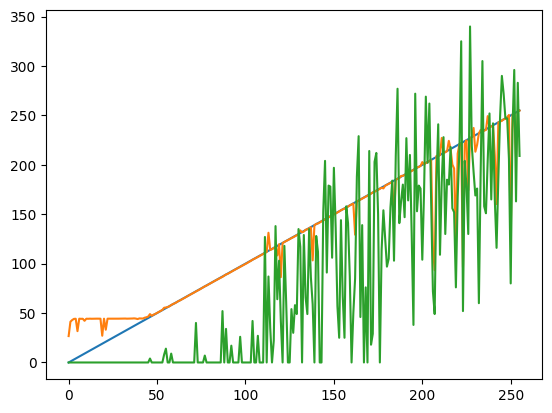

In [84]:
plt.plot(outputs)
plt.plot(reconstructed.detach())
plt.plot(test(model, inputs, outputs, loss_fn).detach())